In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.model import Model
import seaborn as sns

Using TensorFlow backend.


In [2]:
dataloader = DataLoader('601398', '399300')
model = Model()
comp = {"optimizer": "adam",
           "loss": "mse",
           "metrics": [
               "mae",
               "acc"
           ]}
norm=True
days = 3
window = 30
layers = [{'units': 1000, 'type': 'lstm'},
          {'units': days, 'type': 'dense', 'activation': 'linear'}]
train = {'epochs': 1000, 'verbose': 2, 'validation_split': 0.15}

model.build_model(layers, comp)
X, Y = dataloader.get_train_data(window, days, norm)
history = model.train(X, Y, train)
model.model.summary()

Train on 2236 samples, validate on 395 samples
Epoch 1/1000
 - 60s - loss: 6.8428e-04 - mean_absolute_error: 0.0123 - acc: 0.3122 - val_loss: 3.3236e-05 - val_mean_absolute_error: 0.0048 - val_acc: 0.3899
Epoch 2/1000
 - 59s - loss: 4.8400e-05 - mean_absolute_error: 0.0050 - acc: 0.3354 - val_loss: 2.5610e-05 - val_mean_absolute_error: 0.0041 - val_acc: 0.3899
Epoch 3/1000
 - 59s - loss: 4.5502e-05 - mean_absolute_error: 0.0047 - acc: 0.3368 - val_loss: 1.7395e-05 - val_mean_absolute_error: 0.0032 - val_acc: 0.2911
Epoch 4/1000
 - 55s - loss: 4.3008e-05 - mean_absolute_error: 0.0045 - acc: 0.3229 - val_loss: 2.3634e-05 - val_mean_absolute_error: 0.0040 - val_acc: 0.3722
Epoch 5/1000
 - 56s - loss: 5.3394e-05 - mean_absolute_error: 0.0053 - acc: 0.3305 - val_loss: 4.5851e-05 - val_mean_absolute_error: 0.0060 - val_acc: 0.3722
Epoch 6/1000
 - 60s - loss: 4.7858e-05 - mean_absolute_error: 0.0050 - acc: 0.3292 - val_loss: 2.4134e-05 - val_mean_absolute_error: 0.0039 - val_acc: 0.3722
Epoch

Epoch 53/1000
 - 65s - loss: 2.7314e-05 - mean_absolute_error: 0.0037 - acc: 0.3743 - val_loss: 1.4866e-05 - val_mean_absolute_error: 0.0033 - val_acc: 0.3519
Epoch 54/1000
 - 62s - loss: 2.7794e-05 - mean_absolute_error: 0.0037 - acc: 0.3564 - val_loss: 1.2612e-05 - val_mean_absolute_error: 0.0029 - val_acc: 0.3899
Epoch 00054: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1000)              4044000   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3003      
Total params: 4,047,003
Trainable params: 4,047,003
Non-trainable params: 0
_________________________________________________________________


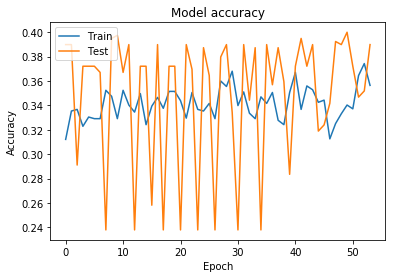

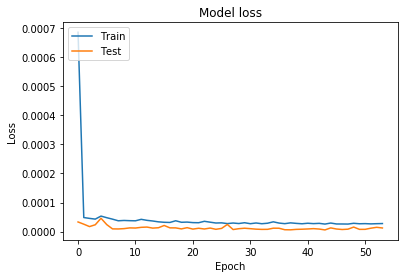

In [3]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
def plot_pred(pred,real,d):
    for day in range(d):
        plt.figure(figsize=(18, 5))
        sns.lineplot(
            x=range(len(real)), y=real[:, day], label='day_{0}'.format(day + 1))
        sns.lineplot(
            x=range(len(pred)),
            y=pred[:, day],
            label='day_{0}_pred'.format(day + 1))
        plt.show()

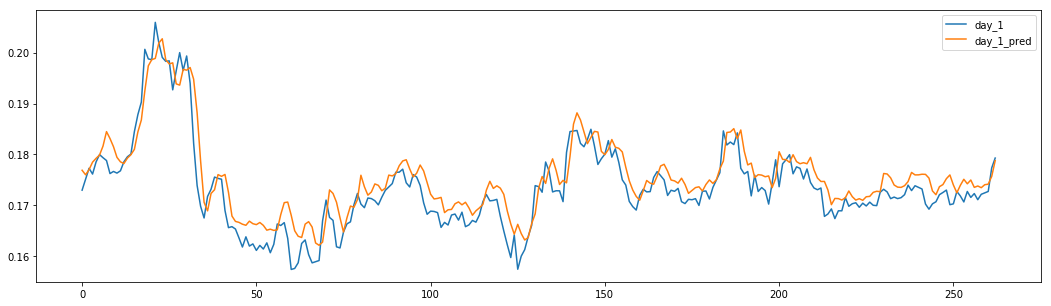

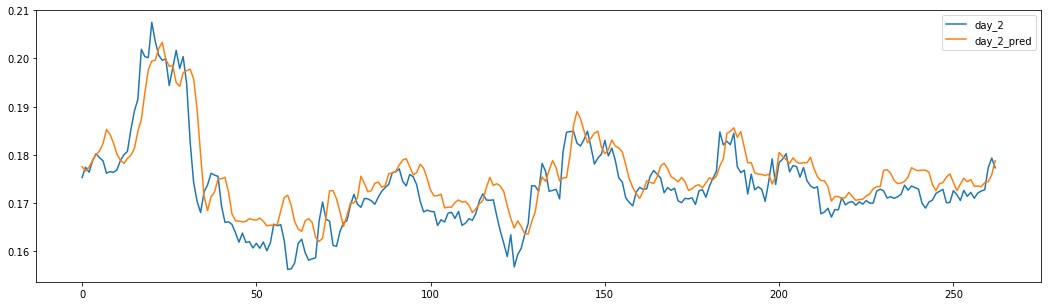

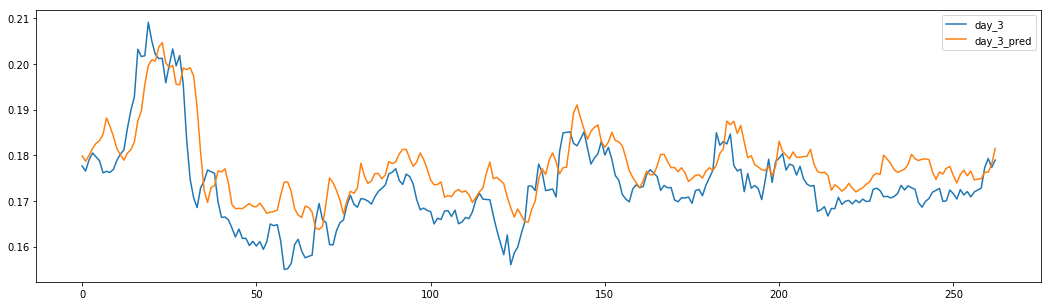

In [29]:
X_val,Y_val=dataloader.get_valid_data(window,days,norm)
Y_pred=model.predict(X_val,{ 'verbose': 2})
plot_pred(Y_pred,Y_val,days)

In [73]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
	# Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i)]
        plt.plot(padding + list(data))
        plt.legend()
    plt.show()

In [21]:
import datetime
start_online=(dataloader.data.index[-1]+datetime.timedelta(days=-30)).strftime('%Y-%m-%d')
print(start_online)
online_data=DataLoader('601398', '399300',split=0,online=True,start=start_online)

2018-12-25


In [24]:
X_online,Y_online=online_data.get_train_data(window,days,norm)
Y_pred_online=model.predict(X_online,{ 'verbose': 2})

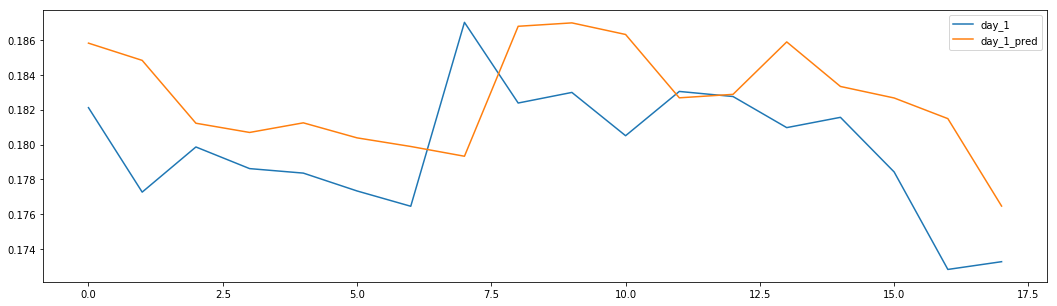

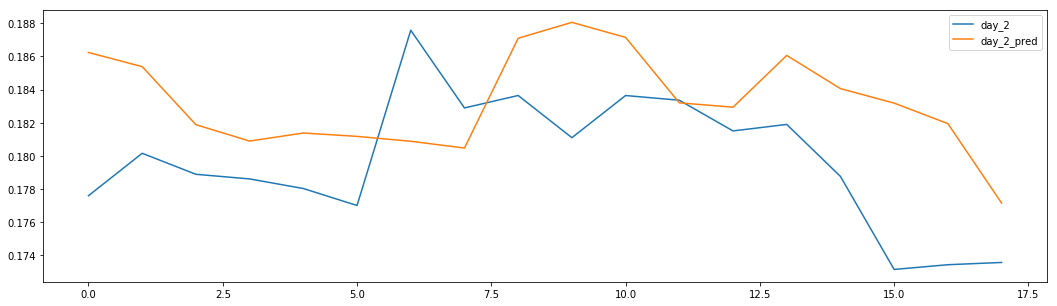

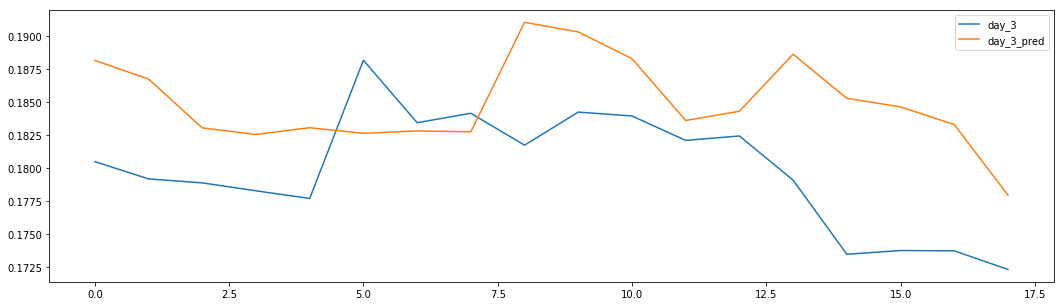

In [31]:
plot_pred(Y_pred_online,Y_online,3)

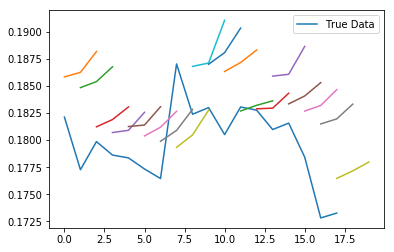

In [74]:
plot_results_multiple(Y_pred_online,Y_online[:,0],days)

In [40]:
online_data.get_train_data(window,days,False)[1][:,0]

array([5.65, 5.51, 5.6 , 5.57, 5.57, 5.56, 5.55, 5.9 , 5.77, 5.81, 5.75,
       5.85, 5.86, 5.82, 5.85, 5.76, 5.59, 5.61])

In [35]:
Y_online[:,0]

(array([0.18211706, 0.1772666 , 0.17985962, 0.17861668, 0.17835841,
        0.17733318, 0.17645394, 0.18701698, 0.18238344, 0.18299237,
        0.18050624, 0.18304899, 0.18275765, 0.18097079, 0.18156205,
        0.17842414, 0.17282499, 0.17327081]), 51)

In [79]:
X_online[:,0][:,0]

array([0.16857915, 0.16954537, 0.16958193, 0.16963775, 0.16651054,
       0.16585118, 0.16755176, 0.16609643, 0.16436635, 0.16566951,
       0.16386827, 0.16396183, 0.16217402, 0.16262495, 0.16262994,
       0.16262617, 0.16664163, 0.16832904])

In [82]:
X_online[:,0,0]

array([0.16857915, 0.16954537, 0.16958193, 0.16963775, 0.16651054,
       0.16585118, 0.16755176, 0.16609643, 0.16436635, 0.16566951,
       0.16386827, 0.16396183, 0.16217402, 0.16262495, 0.16262994,
       0.16262617, 0.16664163, 0.16832904])

In [72]:
import numpy as np
for i, data in enumerate(Y_pred_online):
    padding = [None for p in range(i)]
    print(padding + list(Y_pred_online[i]))

[0.18582314, 0.18624118, 0.18816243]
[None, 0.184833, 0.18538666, 0.18675315]
[None, None, 0.18122329, 0.18188778, 0.18305749]
[None, None, None, 0.18069325, 0.18089989, 0.18255818]
[None, None, None, None, 0.18124582, 0.18138582, 0.18307106]
[None, None, None, None, None, 0.18038288, 0.18118219, 0.18264756]
[None, None, None, None, None, None, 0.1798879, 0.18088725, 0.1828267]
[None, None, None, None, None, None, None, 0.17932679, 0.18047747, 0.1827589]
[None, None, None, None, None, None, None, None, 0.18679145, 0.18709894, 0.19104418]
[None, None, None, None, None, None, None, None, None, 0.18698643, 0.18805775, 0.19031978]
[None, None, None, None, None, None, None, None, None, None, 0.18632072, 0.18715021, 0.18829742]
[None, None, None, None, None, None, None, None, None, None, None, 0.18268235, 0.18320426, 0.18361546]
[None, None, None, None, None, None, None, None, None, None, None, None, 0.18288119, 0.18294203, 0.18431476]
[None, None, None, None, None, None, None, None, None, N